In [1]:
import gzip
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# infos = pd.read_excel("../../1_NanoNASCseq/data/NanoNASCseq_summary_selected.xls")

# Make counts matrix

In [6]:
d = pd.read_excel("../../1_NanoNASCseq/data/NanoNASCseq_summary_selected.xls")
d = d[(d["Strain"] == "K562") & (d["Time"] == 3) & (d["s4U"] == 0) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
print("Cells:", len(d))

Cells: 190


In [15]:
data = dict()
for run, cell in d[["Run", "Cell"]].values:
    path1 = "../../1_NanoNASCseq/results/expression/sqanti3/%s/%s/%s_classification.txt" % (run, cell, cell)
    df1 = pd.read_csv(path1, sep="\t", header=0, index_col=0)
    path2 = "../../1_NanoNASCseq/results/mapping/marked_duplicate/%s/%s.tsv" % (run, cell)
    df2 = pd.read_csv(path2, sep="\t")
    df2 = df2[["UMI", "AllSize"]]
    df = df1.merge(df2, left_index=True, right_on="UMI")
    df.index = df["UMI"]
    data[cell] = df    
    
categories = ["full-splice_match", "incomplete-splice_match", "novel_in_catalog", "novel_not_in_catalog"]
array1 = []
array2 = []
array3 = []
for cell, d in data.items():
    d = d[[x in categories for x in d["structural_category"]]]
    counter1 = defaultdict(int) # read-based
    counter2 = defaultdict(int) # umi-based
    counter3 = defaultdict(int) # umi-based (reads > 1)
    for gid, reads in d[["associated_gene", "AllSize"]].values:
        counter1[gid] += reads
        counter2[gid] += 1
        if reads > 1:
            counter3[gid] += 1
    s1 = pd.Series(counter1, name=cell)
    s2 = pd.Series(counter2, name=cell)
    s3 = pd.Series(counter3, name=cell)
    array1.append(s1)
    array2.append(s2)
    array3.append(s3)
    
m1 = pd.concat(array1, axis=1).fillna(0) # read-based
m1.index.name = "GeneID"
m2 = pd.concat(array2, axis=1).fillna(0) # umi-based
m2.index.name = "GeneID"
m3 = pd.concat(array3, axis=1).fillna(0) # umi-based (reads > 1)
m3.index.name = "GeneID"

In [24]:
m1.to_csv("results/K562_counts.0uM_3h.%dcells.read_based.tsv" % len(m1.columns), sep='\t')
m2.to_csv("results/K562_counts.0uM_3h.%dcells.umi_based.tsv" % len(m2.columns), sep='\t')
m3.to_csv("results/K562_counts.0uM_3h.%dcells.umi2_based.tsv" % len(m3.columns), sep='\t')

In [37]:
d = pd.read_excel("../../1_NanoNASCseq/data/NanoNASCseq_summary_selected.xls")
d = d[(d["Strain"] == "K562") & (d["Time"] == 3) & (d["s4U"] == 50) & (d["ActD"].isna()) & (d["UMIs"] >= 5000) & (d["TCRatio"] >= 0.008)]
print("Cells:", len(d))

Cells: 105


In [38]:
data = dict()
for run, cell in d[["Run", "Cell"]].values:
    path1 = "../../1_NanoNASCseq/results/expression/sqanti3/%s/%s/%s_classification.txt" % (run, cell, cell)
    df1 = pd.read_csv(path1, sep="\t", header=0, index_col=0)
    path2 = "../../1_NanoNASCseq/results/mapping/marked_duplicate/%s/%s.tsv" % (run, cell)
    df2 = pd.read_csv(path2, sep="\t")
    df2 = df2[["UMI", "AllSize"]]
    df = df1.merge(df2, left_index=True, right_on="UMI")
    df.index = df["UMI"]
    data[cell] = df    
    
categories = ["full-splice_match", "incomplete-splice_match", "novel_in_catalog", "novel_not_in_catalog"]
array1 = []
array2 = []
array3 = []
for cell, d in data.items():
    d = d[[x in categories for x in d["structural_category"]]]
    counter1 = defaultdict(int) # read-based
    counter2 = defaultdict(int) # umi-based
    counter3 = defaultdict(int) # umi-based (reads > 1)
    for gid, reads in d[["associated_gene", "AllSize"]].values:
        counter1[gid] += reads
        counter2[gid] += 1
        if reads > 1:
            counter3[gid] += 1
    s1 = pd.Series(counter1, name=cell)
    s2 = pd.Series(counter2, name=cell)
    s3 = pd.Series(counter3, name=cell)
    array1.append(s1)
    array2.append(s2)
    array3.append(s3)
    
m1 = pd.concat(array1, axis=1).fillna(0) # read-based
m1.index.name = "GeneID"
m2 = pd.concat(array2, axis=1).fillna(0) # umi-based
m2.index.name = "GeneID"
m3 = pd.concat(array3, axis=1).fillna(0) # umi-based (reads > 1)
m3.index.name = "GeneID"

In [39]:
m1.to_csv("results/K562_counts.50uM_3h.%dcells.read_based.tsv" % len(m1.columns), sep='\t')
m2.to_csv("results/K562_counts.50uM_3h.%dcells.umi_based.tsv" % len(m2.columns), sep='\t')
m3.to_csv("results/K562_counts.50uM_3h.%dcells.umi2_based.tsv" % len(m3.columns), sep='\t')

# Cell-to-cell correlation

In [2]:
m1 = pd.read_csv("results/K562_counts.0uM_3h.190cells.read_based.tsv", sep="\t", header=0, index_col=0)
m2 = pd.read_csv("results/K562_counts.0uM_3h.190cells.umi_based.tsv", sep="\t", header=0, index_col=0)
m3 = pd.read_csv("results/K562_counts.0uM_3h.190cells.umi2_based.tsv", sep="\t", header=0, index_col=0)
ms = [m1, m2, m3]

In [3]:
m3

,20220719_K562R3.C01,20220719_K562R3.C02,20220719_K562R3.C03,20220719_K562R3.C04,20220719_K562R3.C05,20220719_K562R3.C06,20220719_K562R3.C07,20220719_K562R3.C08,20220719_K562R3.C09,20220719_K562R3.C10,...,20221014_K562R1.C16,20221014_K562R1.C17,20221014_K562R1.C18,20221014_K562R1.C19,20221014_K562R1.C20,20221014_K562R1.C21,20221014_K562R1.C22,20221014_K562R1.C23,20221014_K562R1.C24,20221014_K562R1.C25
GeneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000279457.4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000169972.12,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,3.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
ENSG00000007923.17,3.0,1.0,0.0,3.0,0.0,1.0,3.0,5.0,2.0,6.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
ENSG00000126088.14,18.0,7.0,10.0,9.0,6.0,9.0,5.0,4.0,12.0,11.0,...,2.0,6.0,5.0,1.0,4.0,4.0,3.0,6.0,3.0,5.0
ENSG00000132773.12,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000226002.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ENSG00000256407.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ENSG00000258539.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


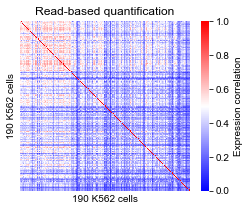

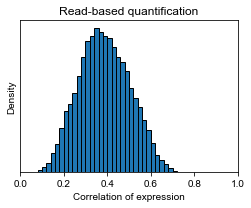

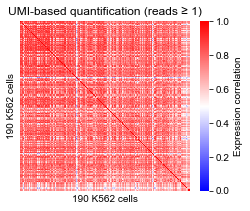

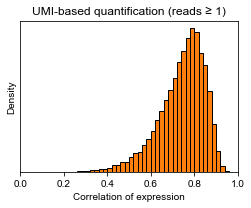

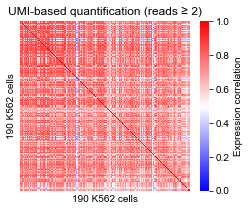

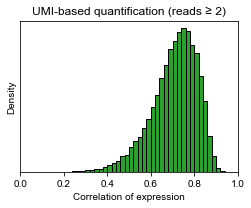

In [60]:
def get_corr_array(corr):
    vs = []
    for i in range(len(corr)):
        for j in range(len(corr)):
            if i < j:
                vs.append(corr.values[i][j])
    return np.array(vs)

names = ["read_based", "umi_based", "umi_based_2"]

for i, m in enumerate(ms):
    name = names[i]
    corr = m.corr()
    
    if i == 0:
        title = "Read-based quantification"
    elif i == 1:
        title = "UMI-based quantification (reads ≥ 1)"
    elif i == 2:
        title = "UMI-based quantification (reads ≥ 2)"
    
    # heatmap
    if True:
        plt.figure(figsize=(3.6, 3))
        plt.title(title)
        sns.heatmap(corr, cmap="bwr", vmin=0, vmax=1, square=True, cbar_kws={"label": "Expression correlation"})
        plt.xticks([])
        plt.yticks([])
        plt.xlabel("%d K562 cells" % len(corr))
        plt.ylabel("%d K562 cells" % len(corr))
        plt.tight_layout()
        plt.savefig("figures/correlation.heatmap.k562.%s.pdf" % name, dpi=300)
        
    # density
    if True:
        vs = get_corr_array(corr)
        plt.figure(figsize=(3.6, 3))
        plt.title(title)
        plt.hist(vs, edgecolor="black", range=(0, 1), bins=50, color="C%d" % i, density=True)
        plt.xlim(0, 1)
        plt.xlabel("Correlation of expression")
        plt.ylabel("Density")        
        plt.yticks([])
        plt.tight_layout()
        plt.savefig("figures/correlation.bar.k562.%s.pdf" % name, dpi=300)
    # break

# Benchmark between replicates

In [2]:
m = pd.read_csv("results/K562_counts.0uM_3h.190cells.umi2_based.tsv", sep="\t", header=0, index_col=0)
m1 = m[list(filter(lambda x: x.startswith("20220719_K562R3."), m.columns))]
m2 = m[list(filter(lambda x: x.startswith("20220729_K562R3."), m.columns))]
print(len(m1.columns), len(m2.columns))

58 70


0.9684884442441756
0.9684884442441756
0.9043337538138764


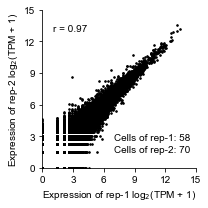

In [5]:
s1 = m1.sum(axis=1) # counts
s2 = m2.sum(axis=1)

xs = s1 * 1e6 / sum(s1) # TPM
ys = s2 * 1e6 / sum(s2)
r1 = np.corrcoef(xs, ys)[0][1]
print(r1)

flags = (xs >= 0) & (ys >= 0)
xs = xs[flags]
ys = ys[flags]
r2 = np.corrcoef(xs, ys)[0][1]
print(r2)

xs = np.log2(xs + 1) # log2
ys = np.log2(ys + 1)
r3 = np.corrcoef(xs, ys)[0][1]
print(r3)

plt.figure(figsize=(3, 3))
plt.scatter(xs, ys, marker=".", s=10, color="black")
# sns.kdeplot(x=xs, y=ys, fill=True, cmap='Blues', cbar=False, alpha=1, zorder=2)
plt.text(1, 13, "r = %.2f" % r2)
plt.text(7, 2.6, "Cells of rep-1: %d" % len(m1.columns))
plt.text(7, 1.5, "Cells of rep-2: %d" % len(m2.columns))
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xticks([0, 3, 6, 9, 12, 15])
plt.yticks([0, 3, 6, 9, 12, 15])
plt.xlabel("Expression of rep-1 log$_2$(TPM + 1)")
plt.ylabel("Expression of rep-2 log$_2$(TPM + 1)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/correlation.K562.run1_vs_run2.pdf", dpi=300)

# Benchmark to control

In [2]:
m1 = pd.read_csv("results/K562_counts.0uM_3h.190cells.umi2_based.tsv", sep="\t", header=0, index_col=0)
m2 = pd.read_csv("results/K562_counts.50uM_3h.105cells.umi2_based.tsv", sep="\t", header=0, index_col=0)
print(len(m1.columns), len(m2.columns))

190 105


0.9808170353234936
0.9808170353234936
0.9272021570437818


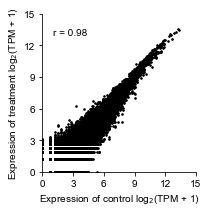

In [4]:
m = pd.concat([m1.sum(axis=1), m2.sum(axis=1)], axis=1).fillna(0)
s1, s2 = m[0], m[1] # counts

xs = s1 * 1e6 / sum(s1) # TPM
ys = s2 * 1e6 / sum(s2)
r1 = np.corrcoef(xs, ys)[0][1]
print(r1)

flags = (xs >= 0) & (ys >= 0)
xs = xs[flags]
ys = ys[flags]
r2 = np.corrcoef(xs, ys)[0][1]
print(r2)

xs = np.log2(xs + 1) # log2
ys = np.log2(ys + 1)
r3 = np.corrcoef(xs, ys)[0][1]
print(r3)

plt.figure(figsize=(3, 3))
plt.scatter(xs, ys, marker=".", s=10, color="black")
# sns.kdeplot(x=xs, y=ys, fill=True, cmap='Blues', cbar=False, alpha=1, zorder=2)
# plt.plot([0, 15], [0, 15], lw=1, ls="--", color="black")
plt.text(1, 13, "r = %.2f" % r2)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xticks([0, 3, 6, 9, 12, 15])
plt.yticks([0, 3, 6, 9, 12, 15])
plt.xlabel("Expression of control log$_2$(TPM + 1)")
plt.ylabel("Expression of treatment log$_2$(TPM + 1)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("figures/correlation.K562.0uM_vs_50uM.pdf", dpi=300)

# Benchmark to bulk RNA-seq

In [213]:
m1 = pd.read_csv("results/K562_counts.0uM_3h.190cells.read_based.tsv", sep="\t", header=0, index_col=0)
m2 = pd.read_csv("results/K562_counts.0uM_3h.190cells.umi_based.tsv", sep="\t", header=0, index_col=0)
m3 = pd.read_csv("results/K562_counts.0uM_3h.190cells.umi2_based.tsv", sep="\t", header=0, index_col=0)
ms = [m1, m2, m3]

In [214]:
m0 = pd.read_csv("../../4_RNAseq_ActD/results/expression/fpkm/20221128_K562_Actd_0h_rep1.human.rmdup.tsv", sep="\t", index_col=0)
# vs = m0["Count"] / m0["Length"]
# m0["TPM"] = vs * 1e6 / sum(vs)
m0 = m0[(m0["Canonical"]) & (m0["GeneType"] == "protein_coding")]
m0 = m0[~m0["GeneID"].duplicated()]
m0.index = m0["GeneID"]
s0 = m0["FPKM"]
# s0 = m0["TPM"]

--------------------------------------------------------------------------------
read_based
0.7837101121954542
0.8010026820081861
--------------------------------------------------------------------------------
umi_based
0.8009136296805162
0.8611876436959762
--------------------------------------------------------------------------------
umi2_based
0.8004854824730939
0.8548032595231801


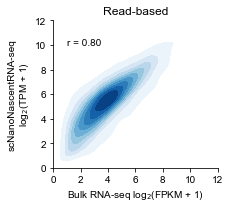

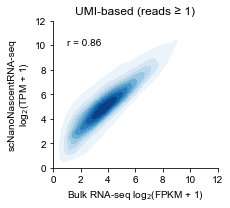

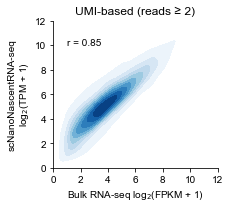

In [215]:
names = ["read_based", "umi_based", "umi2_based"]
for i, m in enumerate(ms):
    print("-" * 80)
    print(names[i])
    m = ms[i]
    s = m.sum(axis=1)
    s = s * 1e6 / sum(s)
    s.name = "TPM"
    m = pd.concat([s0, s], axis=1).fillna(0)
    m = m[(m["FPKM"] >= 1) & (m["TPM"] >= 1)]
    
    xs = m["FPKM"]
    ys = m["TPM"]
    r = np.corrcoef(xs, ys)[0][1]
    print(r)
    xs = np.log2(xs + 1)
    ys = np.log2(ys + 1)
    r = np.corrcoef(xs, ys)[0][1]
    print(r)
    
    plt.figure(figsize=(3.3, 3))
    if i == 0:
        title = "Read-based"
    elif i == 1:
        title = "UMI-based (reads ≥ 1)"
    else:
        title = "UMI-based (reads ≥ 2)"
    plt.title(title)
    #plt.scatter(xs, ys, marker=".")
    sns.kdeplot(x=xs, y=ys, fill=True, cmap='Blues', cbar=False, alpha=1, zorder=2)
    # plt.plot([0, 12], [0, 12], lw=1, ls="--", color="grey")
    plt.text(1, 10, "r = %.2f" % r)
    plt.xlim(0, 12)
    plt.ylim(0, 12)
    plt.xticks(np.arange(0, 13, 2))
    plt.yticks(np.arange(0, 13, 2))
    plt.xlabel("Bulk RNA-seq log$_2$(FPKM + 1)")
    plt.ylabel("scNanoNascentRNA-seq\nlog$_2$(TPM + 1)")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    
    plt.tight_layout()
    plt.savefig("figures/correlation.nanonasc_seq_vs_bulk_rna_seq.scatter.%s.pdf" % names[i], dpi=300)

# Benchmark to SCAN-seq2

In [200]:
anno_gene = pd.read_csv("/home/chenzonggui/species/homo_sapiens/GRCh38.p13/gencode.v39.genes.tsv", sep="\t")
gid2gname = {gid: gname for gid, gname in anno_gene[["GeneID", "GeneName"]].values}

In [201]:
m = pd.read_csv("results/K562_counts.0uM_3h.190cells.umi_based.tsv", sep="\t", index_col=0)
m = m[["_" not in x for x in m.index]]
d = m.sum(axis=1).to_frame()
d.index.name = "GeneID"
d.columns = ["UMIs"]
d["TPM"] = d["UMIs"] * 1e6 / d["UMIs"].sum()
d["GeneName"] = [gid2gname[gid] for gid in d.index]
d = d[~d["GeneName"].duplicated()]

In [202]:
tmp = pd.read_csv(gzip.open("../../liujune_nascent_rna/A2_GSE203561_SCAN-seq2/data/GSE203561_RAW/GSM6176324_gene_counts_UMI_100.txt.gz", "rt"), sep="\t", index_col=0)
tmp = tmp[[x == x.upper() for x in tmp.index]]
tmp = tmp[tmp.columns[tmp.sum(axis=0) > 50000]]

In [203]:
d2 = tmp.sum(axis=1).to_frame()
d2.index.name = "GeneName"
d2.columns=["SCANseq2"]
d3 = d.merge(d2, left_on="GeneName", right_index=True)

0.748471669518882
0.748471669518882
0.8469706912039795


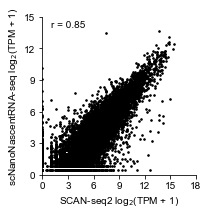

In [205]:
xs = d3["SCANseq2"]
ys = d3["TPM"]
r1 = np.corrcoef(xs, ys)[0][1]
print(r1)

flags = (xs >= 0) & (ys >= 0)
xs = xs[flags]
ys = ys[flags]
r2 = np.corrcoef(xs, ys)[0][1]
print(r2)

xs = np.log2(xs + 1)
ys = np.log2(ys + 1)
r3 = np.corrcoef(xs, ys)[0][1]
print(r3)

plt.figure(figsize=(3, 3))
plt.scatter(xs, ys, marker=".", s=10, color="black")
# plt.plot([0, 15], [0, 15], color="red")
plt.text(1, 14, "r = %.2f" % r3)
plt.xlim(0, 15)
plt.ylim(0, 12)
plt.xlabel("SCAN-seq2 log$_2$(TPM + 1)")
plt.ylabel("scNanoNascentRNA-seq log$_2$(TPM + 1)")
plt.xticks([0, 3, 6, 9, 12, 15, 18])
plt.yticks([0, 3, 6, 9, 12, 15])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/correlation.nanonasc_seq_vs_scan_seq2.pdf", dpi=300)

# Benchmark to NASC-seq

In [216]:
# NanoNASC-seq

m1 = pd.read_csv("results/K562_counts.0uM_3h.190cells.umi_based.tsv", sep="\t", header=0, index_col=0)
s1 = m1.sum(axis=1)
s1 = s1 * 1e6 / sum(s1)
s1.name = "NanoNASC-seq"

In [217]:
# NASC-seq

d = pd.read_excel("../../2_NASCseq/data/NASCseq.xlsx")
d = d[(d["s4U"] == 0) & (d["Time"] == 3) & (d["Layout"] == "PE")]
print(len(d))

39


In [190]:
d = pd.read_excel("../../2_NASCseq/data/NASCseq.xlsx")
d = d[(d["Time"] == 3) & (d["Layout"] == "PE")]
print(len(d))

98


In [191]:
d = pd.read_excel("../../2_NASCseq/data/NASCseq.xlsx")
d = d[(d["Strain"] == "K562") & (d["Run"] == "GSE128273_NASCseq_K562") & (d["Layout"] == "PE")]
print(len(d))

188


In [218]:
array = []
for run, cell in d[["Run", "Cell"]].values:
    path = "../../2_NASCseq/results/expression/fpkm/%s/%s.tsv" % (run, cell)
    tmp = pd.read_csv(path, sep="\t", index_col=0)
    tmp = tmp[tmp["Canonical"]]
    tmp = tmp[tmp["GeneType"] == "protein_coding"]
    tmp = tmp[~tmp["GeneID"].duplicated()]
    tmp.index = tmp["GeneID"]
    s = tmp["FPKM"]
    s.name = cell
    array.append(s)

In [219]:
m = pd.concat(array, axis=1)
s2 = m.mean(axis=1)
s2.name = "NASC-seq"

In [220]:
m = pd.concat([s1, s2], axis=1).fillna(0)
m = m[m.max(axis=1) > 0]

0.7276375611229512
0.7276375611229512
0.8259440195946974


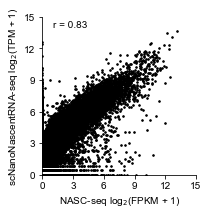

In [221]:
xs = m["NASC-seq"]
ys = m["NanoNASC-seq"]

r1 = np.corrcoef(xs, ys)[0][1]
print(r1)

flags = (xs >= 0) & (ys >= 0)
xs = xs[flags]
ys = ys[flags]
r2 = np.corrcoef(xs, ys)[0][1]
print(r2)

xs = np.log2(xs + 1)
ys = np.log2(ys + 1)
r3 = np.corrcoef(xs, ys)[0][1]
print(r3)

plt.figure(figsize=(3, 3))
plt.scatter(xs, ys, marker=".", s=10, color="black")
# plt.plot([0, 15], [0, 15], color="red")
plt.text(1, 14, "r = %.2f" % r3)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xlabel("NASC-seq log$_2$(FPKM + 1)")
plt.ylabel("scNanoNascentRNA-seq log$_2$(TPM + 1)")
plt.xticks([0, 3, 6, 9, 12, 15])
plt.yticks([0, 3, 6, 9, 12, 15])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/correlation.nanonasc_seq_vs_nasc_seq.pdf", dpi=300)